In [2]:
%reload_ext cypher
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

## Global users networks

In [4]:
dfUsersRel = %cypher match  (u1:user)-[:TWEETS]->(:tweet)<-[r:RETWEETS|:QUOTES|:REPLIES]-(:tweet)<-[:TWEETS]- (u2:user) where u1.screen_name <> u2.screen_name  return u1.uid as Target, u1.screen_name as user1, u2.uid as Source, u2.screen_name as user2, type(r) as Label, count(r) as Weight order by Weight desc

781858 rows affected.


In [5]:
dfUsersRel = dfUsersRel.get_dataframe()
dfUsersRel = dfUsersRel[dfUsersRel.user1 != dfUsersRel.user2] 

In [6]:
len(dfUsersRel)

781858

In [8]:
##edges 
dfUsersRel.to_csv('graphs/general/users_edges.csv', sep='\t', encoding='utf-8')

In [9]:
dfUsersRel.head()

,Target,user1,Source,user2,Label,Weight
0,960681544858783744,ahura_mazda999,958987928461459457,dragonfly369sp,RETWEETS,495
1,17744841,RaulOrozco,3632039176,bvanhool,RETWEETS,280
2,17744841,RaulOrozco,999439018046652417,TammyWhipple12,RETWEETS,245
3,969688546373193729,ChangeTheRef,501996039,ReadySetRock75,RETWEETS,173
4,250309546,book_tribe,1497738242,KaceyKells,RETWEETS,147


In [10]:
##getting nodes
dfUsersNodes = dfUsersRel[['Target', 'user1']] 
dfUsersNodes.columns = ['ID', 'Label']

dfUsersNodes2 = dfUsersRel[['Source', 'user2']] 
dfUsersNodes2.columns = ['ID', 'Label']

frames = [dfUsersNodes, dfUsersNodes2]
result = pd.concat(frames)
result = result.drop_duplicates(['ID'])

result.to_csv('graphs/general/users_nodes.csv', sep='\t', encoding='utf-8')
result.head()

,ID,Label
0,960681544858783744,ahura_mazda999
1,17744841,RaulOrozco
3,969688546373193729,ChangeTheRef
4,250309546,book_tribe
6,4485034093,2billionlady


###  Top 20 Strongest users relationships 

In [11]:
sum_df = dfUsersRel.groupby(['user1','user2'], sort = False).agg({'Weight': 'sum'})
sum_df = sum_df.reset_index()
sum_df.head(20)

,user1,user2,Weight
0,ahura_mazda999,dragonfly369sp,495
1,RaulOrozco,bvanhool,280
2,RaulOrozco,TammyWhipple12,245
3,ChangeTheRef,ReadySetRock75,173
4,book_tribe,KaceyKells,147
5,RaulOrozco,CarolineSalfati,136
6,2billionlady,starrier1004,117
7,ahura_mazda999,AceStriker11,102
8,RaulOrozco,faminas_m,92
9,donthemighty,dekreiti1,81


## Top 15 users with biggest subnet of users (orden por cantidad de usuarios)

In [12]:
sum_df = dfUsersRel.groupby(['user1'], sort = False).agg({'Weight': 'sum', 'user2':'count'})
sf = sum_df.sort_values('user2', ascending = 0).reset_index()
sf.columns = ['Users', 'Number of users', 'Number of reactions']
sf.head(15)

,Users,Number of users,Number of reactions
0,OdehEveryday,97683,97563
1,MuslimIQ,32145,19052
2,RealCandaceO,20297,10568
3,DisavowTrump20,10422,9806
4,JanelleMonae,6268,6256
5,pinklionheart,6140,6129
6,Alyssa_Milano,6301,6045
7,SaysHummingbird,5633,5209
8,andexihaeienni,5600,5160
9,dylanobrien,5056,5043


# Top 15 users most retweeted, quoted and replied. (orden por cantidad de tweets)

In [13]:
sum_df2 = dfUsersRel.groupby(['user1'], sort = False).agg({'Weight': 'sum', 'user2':'count'})
sf2 = sum_df2.sort_values('Weight', ascending = 0).reset_index()
sf2.columns = ['Users', 'Number of users', 'Number of reactions']
sf2.head(15)

,Users,Number of users,Number of reactions
0,OdehEveryday,97683,97563
1,MuslimIQ,32145,19052
2,RealCandaceO,20297,10568
3,DisavowTrump20,10422,9806
4,Alyssa_Milano,6301,6045
5,JanelleMonae,6268,6256
6,pinklionheart,6140,6129
7,SaysHummingbird,5633,5209
8,andexihaeienni,5600,5160
9,dylanobrien,5056,5043


## Top 10 users selected for network analysis

/home/cultureplex/git/.virtualenvs/social_protests/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/cultureplex/git/.virtualenvs/social_protests/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


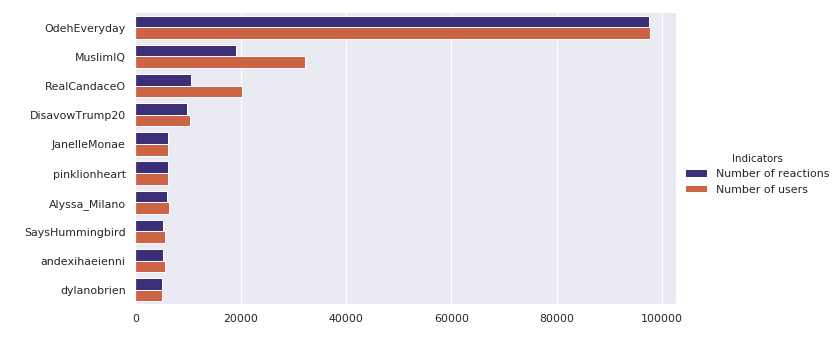

In [14]:
sf_ = sf.head(10)
sf_ = sf_[['Users', 'Number of reactions', 'Number of users']]
sf_e = pd.melt(sf_, id_vars="Users", var_name="Indicators", value_name="Values")
ax = sns.factorplot(x='Values', y='Users', hue='Indicators', data=sf_e, kind='bar', palette=['#362284', '#e4572e'], size=5, aspect=2)
ax.set(xlabel=' ', ylabel=' ')
plt.savefig('top_users.png', format='png', dpi=144)
plt.show()
